# SmarTemplateAnalysisGroupedBy

In [26]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [27]:
pre = pd.read_csv('TrainingSetNoMissingValue.csv')
post = pd.read_csv('TrainingSetcorretto.csv')
pre["PurchDate"] = pre["PurchDate"].astype("datetime64")
post["PurchDate"] = post["PurchDate"].astype("datetime64")

#Variabile categorica rispetto alla quela effettuare l'analisi
VarGroup='IsBadBuy'

#Set dei titoli relativi ai plot delle variabili
RealTitle=VarGroup+' by '
additional1=' pre'
additional2=' post'

#variabile che definisce la presenza di un confroto
comp=True

#numero di bins  per gli istogrammi
PreBins=math.ceil(math.log(pre.shape[0],2))+1
PostBins=math.ceil(math.log(post.shape[0],2))+1

#listaVariabiliCategoriche
categories=['IsBadBuy', 'Auction', 'Make', 'Engine', 'Trim', 'SubModelSpecifics', 'Color', 'Transmission', 
            'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
            'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale', 'Model', 'Wheeldrives', 'Doors', 'SubModel']

#listaVariabiliNumeriche (per statistiche)
num_catProp=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
         'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
         'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
         'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost','VehOdo']

##listaVariabiliNumeriche (per statistiche con limite superiore e inferiore) (Non implementati i limiti!)
num_catDis=[['VehOdo', 20000,0], ['MMRAcquisitionAuctionAveragePrice',20000,0], ['MMRAcquisitionAuctionCleanPrice',20000,0], 
         ['MMRAcquisitionRetailAveragePrice',20000,0],['MMRAcquisitonRetailCleanPrice',20000,0],
         ['MMRCurrentAuctionAveragePrice',20000,0],['MMRCurrentAuctionCleanPrice',20000,0],
         ['MMRCurrentRetailAveragePrice',20000,0],['MMRCurrentRetailCleanPrice',20000,0],['VehBCost',20000,0],['WarrantyCost',20000,0]]

In [28]:
pre.isnull().sum() 

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19402
Trim                                     0
SubModelSpecifics                    48333
Color                                    7
Transmission                             0
WheelTypeID                              0
WheelType                             2550
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [29]:
post.isnull().sum() 

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    0
IsBadBuy                                 0
Auction                                  0
VehicleAge                               0
Make                                     0
Engine                               17828
Trim                                     0
SubModelSpecifics                    43175
Color                                    7
Transmission                             0
WheelTypeID                              0
WheelType                             2306
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

In [30]:
(pre == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             50402
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [31]:
(post == 0).sum(axis=0)

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    0
IsBadBuy                             44529
Auction                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

In [32]:
(pre == 1).sum(axis=0)

RefId                                    1
IsBadBuy                              7093
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                            2437
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          30852
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [33]:
(post == 1).sum(axis=0)

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    1
IsBadBuy                              6377
Auction                                  0
VehicleAge                            2284
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          26928
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

# Analisi Variabili Particolari

# PurchDate

In [34]:
Variable='PurchDate'

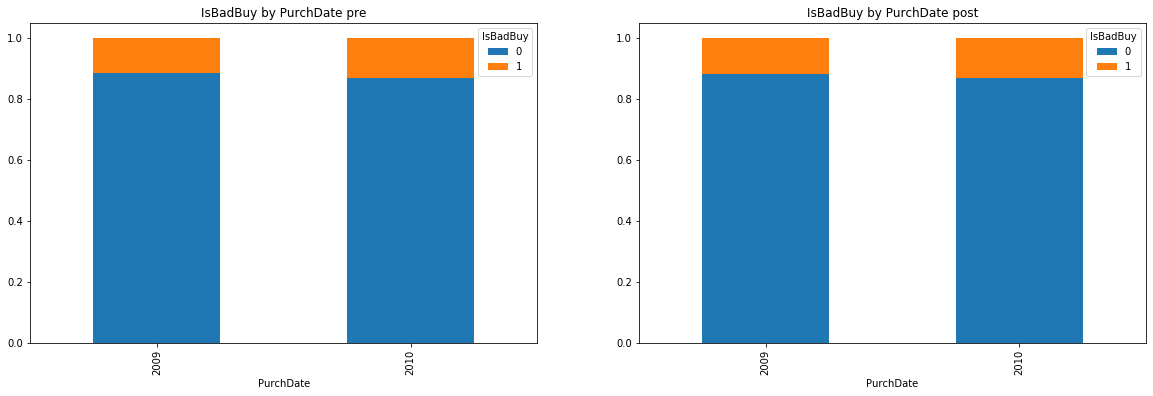

In [35]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable].dt.year, pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable].dt.year, post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

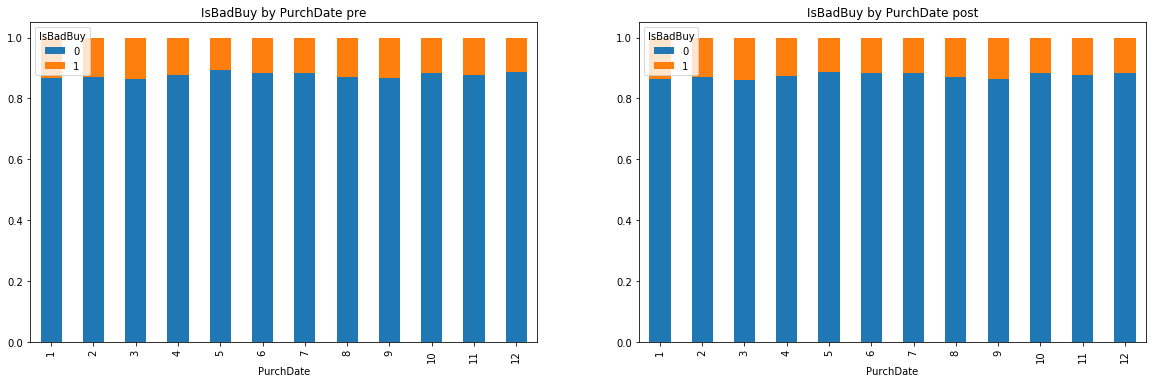

In [36]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable].dt.month, pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable].dt.month, post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

# VehicleYear

In [37]:
Variable='VehYear'

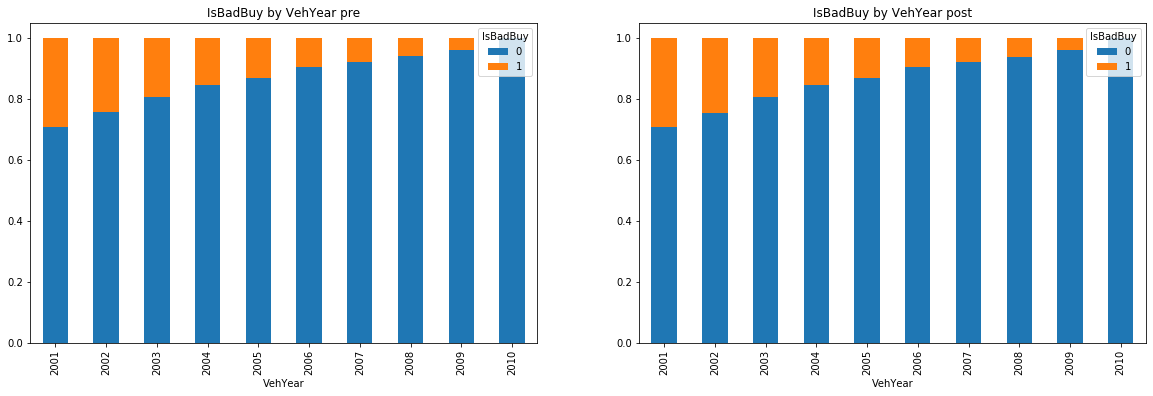

In [38]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

In [39]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

2006    13489
2005    12153
2007     8991
2004     7994
2008     5428
2003     4919
2002     2682
2001     1175
2009      663
2010        1
Name: VehYear, dtype: int64


In [40]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

2006    11649
2005    10362
2007     7948
2004     7065
2008     4952
2003     4555
2002     2577
2001     1165
2009      632
2010        1
Name: VehYear, dtype: int64


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


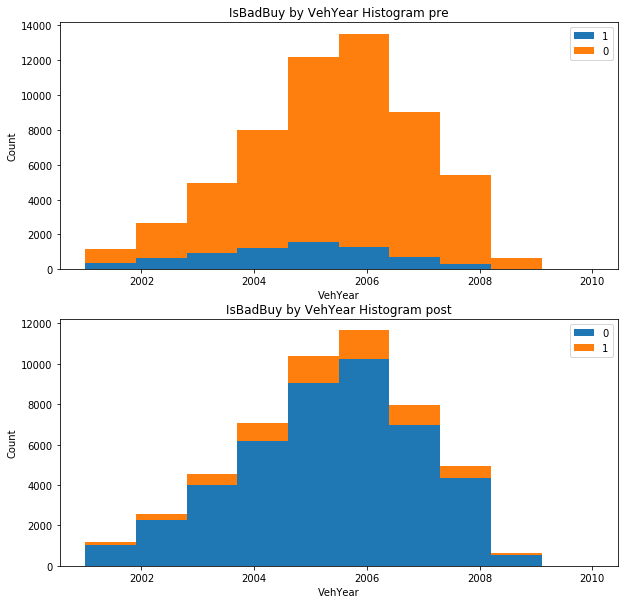

In [41]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig, axes = plt.subplots(2, 1, figsize=(10,10))

    title=RealTitle+Variable+str(' Histogram')
    listUnique=list(pre[VarGroup].unique())
    listToPlot=[]

    for value in listUnique:
        tmp = pre[pre[VarGroup] == value][Variable]
        listToPlot.append(tmp)

    max1 = pre[Variable].max()
    min1 = pre[Variable].min()
    bins1 = int(max1 / 10)
    
    if pre[Variable].nunique() <20:
        bins1=pre[Variable].nunique()
        

    axes[0].hist(listToPlot, 
                 bins=bins1, # bin_size
                 range=(min1, max1), 
                 stacked=True)


    axes[0].legend(tuple(listUnique), loc='best')
    axes[0].set_title(title+additional1)
    axes[0].set_xlabel(Variable)
    axes[0].set_ylabel('Count')

    if compare:
        listUnique=list(post[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            tmp = post[pre[VarGroup] == value][Variable]
            listToPlot.append(tmp)

        max1 = post[Variable].max()
        min1 = post[Variable].min()
        bins1 = int(max1 / 10)
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()

        axes[1].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[1].legend(tuple(listUnique), loc='best')
        axes[1].set_title(title+additional2)
        axes[1].set_xlabel(Variable)
        axes[1].set_ylabel('Count')
        
    plt.show()
    

# VehicleAge

In [42]:
Variable='VehicleAge'

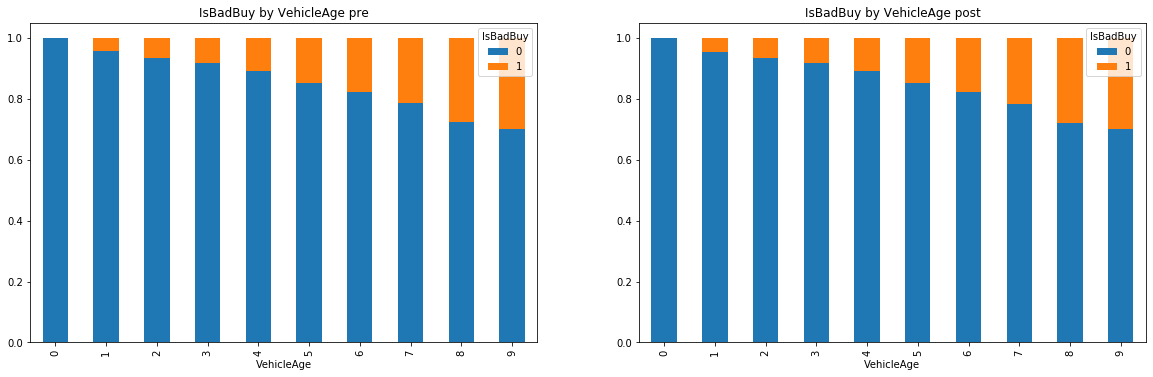

In [43]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

In [44]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

4    13467
3    12527
5    10164
2     6668
6     6288
7     3664
1     2437
8     1776
9      503
0        1
Name: VehicleAge, dtype: int64


In [45]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

4    11424
3    10844
5     8861
2     6069
6     5739
7     3464
1     2284
8     1725
9      495
0        1
Name: VehicleAge, dtype: int64


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


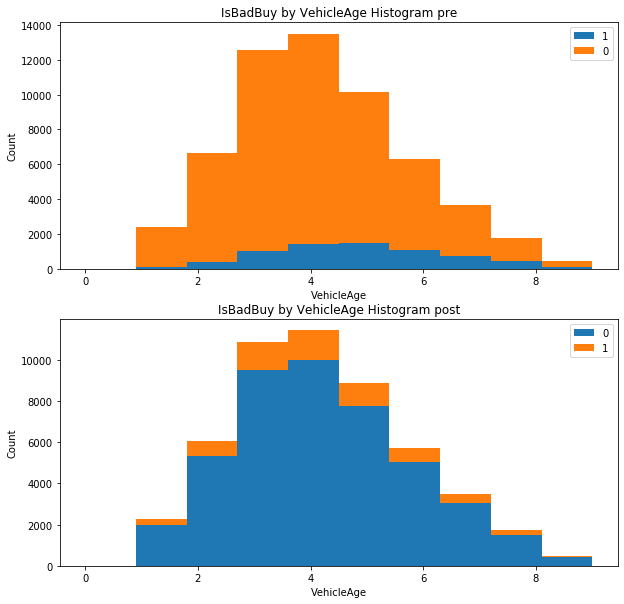

In [46]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig, axes = plt.subplots(2, 1, figsize=(10,10))

    title=RealTitle+Variable+str(' Histogram')
    listUnique=list(pre[VarGroup].unique())
    listToPlot=[]

    for value in listUnique:
        tmp = pre[pre[VarGroup] == value][Variable]
        listToPlot.append(tmp)

    max1 = pre[Variable].max()
    min1 = pre[Variable].min()
    bins1 = int(max1 / 10)
    
    if pre[Variable].nunique() <20:
        bins1=pre[Variable].nunique()
        

    axes[0].hist(listToPlot, 
                 bins=bins1, # bin_size
                 range=(min1, max1), 
                 stacked=True)


    axes[0].legend(tuple(listUnique), loc='best')
    axes[0].set_title(title+additional1)
    axes[0].set_xlabel(Variable)
    axes[0].set_ylabel('Count')

    if compare:
        listUnique=list(post[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            tmp = post[pre[VarGroup] == value][Variable]
            listToPlot.append(tmp)

        max1 = post[Variable].max()
        min1 = post[Variable].min()
        bins1 = int(max1 / 10)
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()

        axes[1].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[1].legend(tuple(listUnique), loc='best')
        axes[1].set_title(title+additional2)
        axes[1].set_xlabel(Variable)
        axes[1].set_ylabel('Count')
        
    plt.show()

# Analisi Comulativa delle Variabili Simili

IsBadBuy


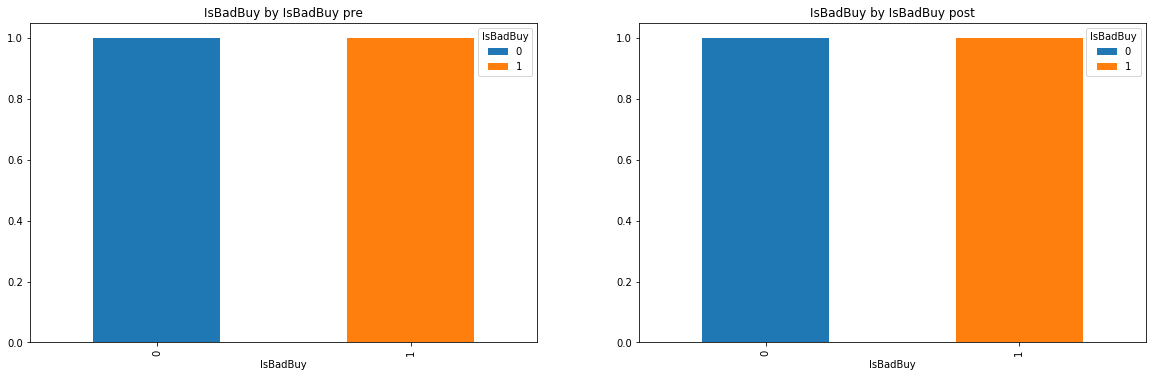

I valori nel pre con meno di 2 elementi sono:
Series([], Name: IsBadBuy, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: IsBadBuy, dtype: int64)





Auction


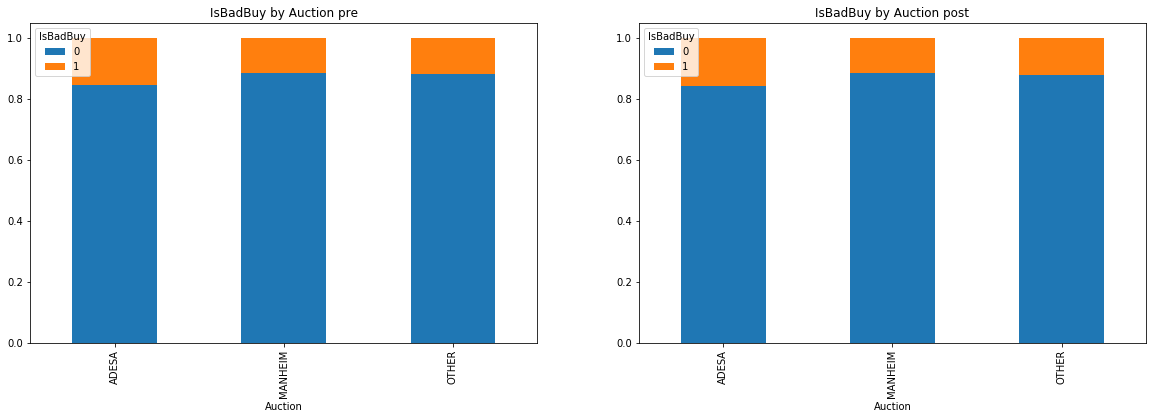

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Auction, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Auction, dtype: int64)





Make


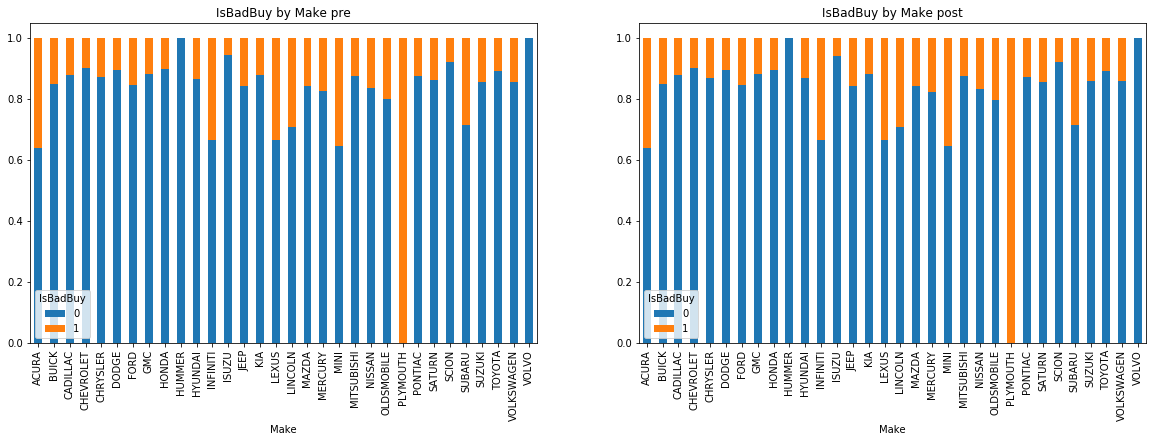

I valori nel pre con meno di 2 elementi sono:
HUMMER      1
PLYMOUTH    1
Name: Make, dtype: int64


I valori nel post con meno di 2 elementi sono:
HUMMER      1
PLYMOUTH    1
Name: Make, dtype: int64





Engine


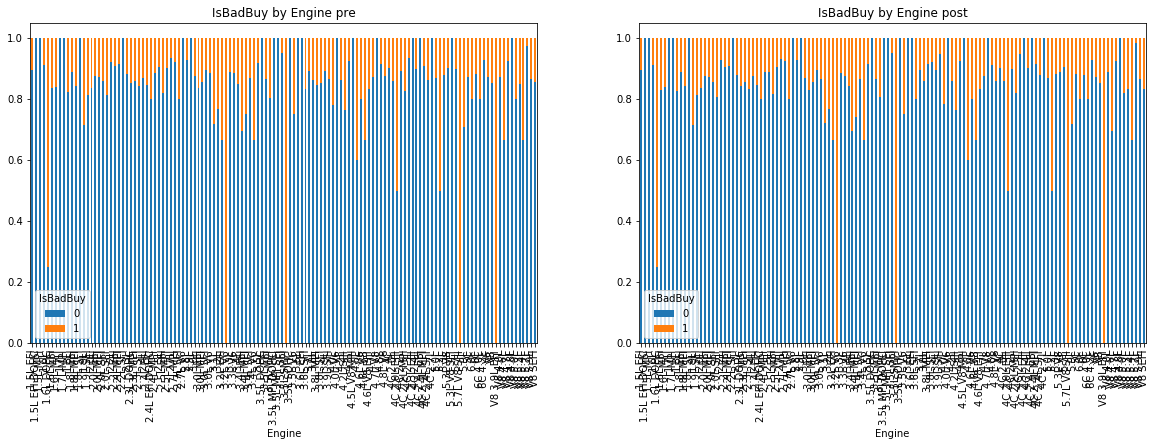

I valori nel pre con meno di 2 elementi sono:
5.3L V8 SFI     1
3.5L SMPI       1
1.7L            1
3.2L V6         1
3.6L EFI        1
3.5L DOHC       1
3.5L MPI SFI    1
3.5L SOHC       1
V8 3.9L EFI     1
Name: Engine, dtype: int64


I valori nel post con meno di 2 elementi sono:
3.6L EFI        1
1.7L            1
3.5L DOHC       1
3.5L MPI SFI    1
3.5L SOHC       1
V8 3.9L EFI     1
3.2L V6         1
3.5L SMPI       1
1.8L SFI        1
Name: Engine, dtype: int64





Trim


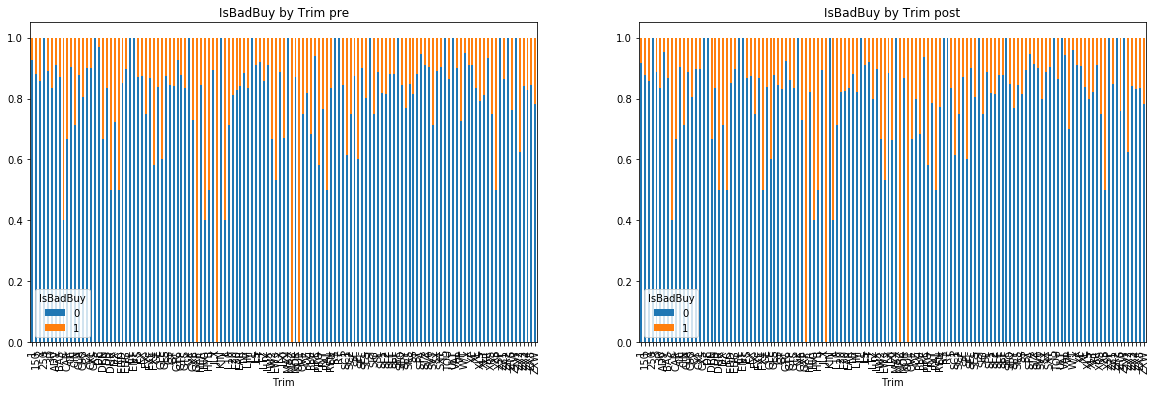

I valori nel pre con meno di 2 elementi sono:
LL     1
MAZ    1
SI     1
JLX    1
OUT    1
ULT    1
XSP    1
Name: Trim, dtype: int64


I valori nel post con meno di 2 elementi sono:
XSP    1
ULT    1
OUT    1
LL     1
MAZ    1
SI     1
JLX    1
Name: Trim, dtype: int64





SubModelSpecifics


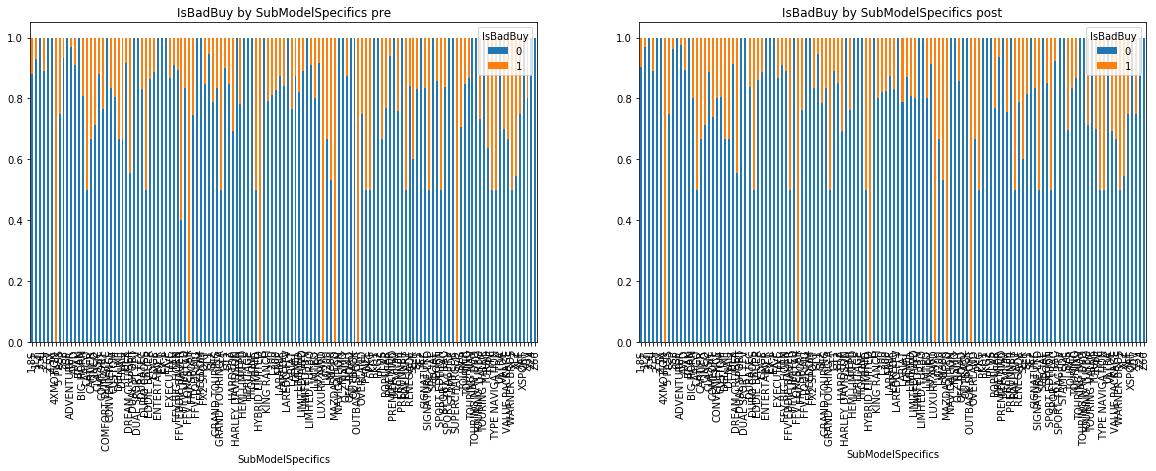

I valori nel pre con meno di 2 elementi sono:
HYBRID LIMITED     1
SUPERCHARGED       1
FFV LONESTAR       1
TOURING NAV        1
COMFORT DURATEC    1
TOURING VALUE      1
OFF-ROAD           1
FREEDOM            1
OUTBACK            1
DUAL SPORT         1
STAMPEDE           1
LUXURY AWD         1
OUTBACK SPORT      1
DUAL SPORT FFV     1
4XMOTION           1
2.5T               1
MAZDASPEED         1
NISMO              1
ULTRA              1
SPORT TRAC FFV     1
BEAN               1
TOURING NAV DVD    1
Name: SubModelSpecifics, dtype: int64


I valori nel post con meno di 2 elementi sono:
BEAN               1
TOURING NAV        1
HYBRID LIMITED     1
ULTRA              1
TOURING VALUE      1
FFV LONESTAR       1
SPORT TRAC FFV     1
DUAL SPORT FFV     1
LUXURY AWD         1
OFF-ROAD           1
OUTBACK            1
FREEDOM            1
DUAL SPORT         1
MAZDASPEED         1
PLUS               1
2.5T               1
STAMPEDE           1
4XMOTION           1
OUTBACK SPORT      1
NISMO 

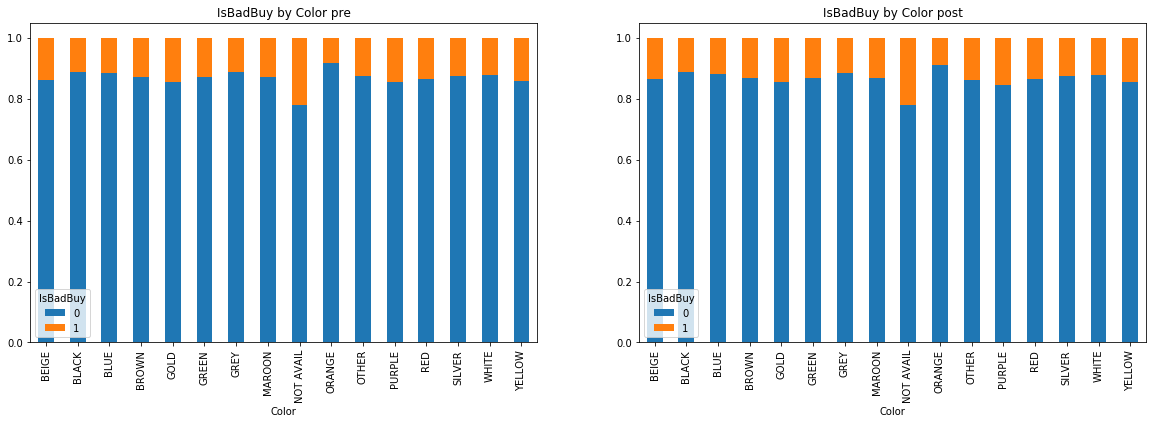

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Color, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Color, dtype: int64)





Transmission


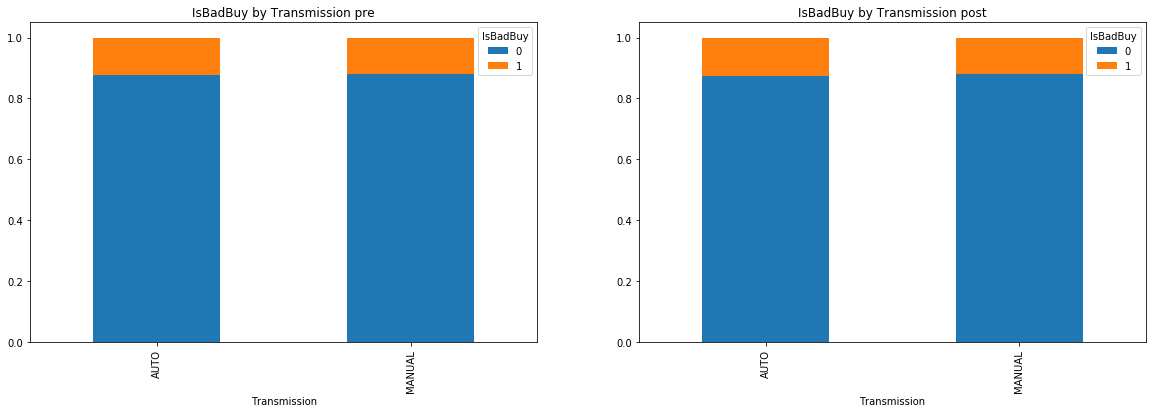

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Transmission, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Transmission, dtype: int64)





WheelTypeID


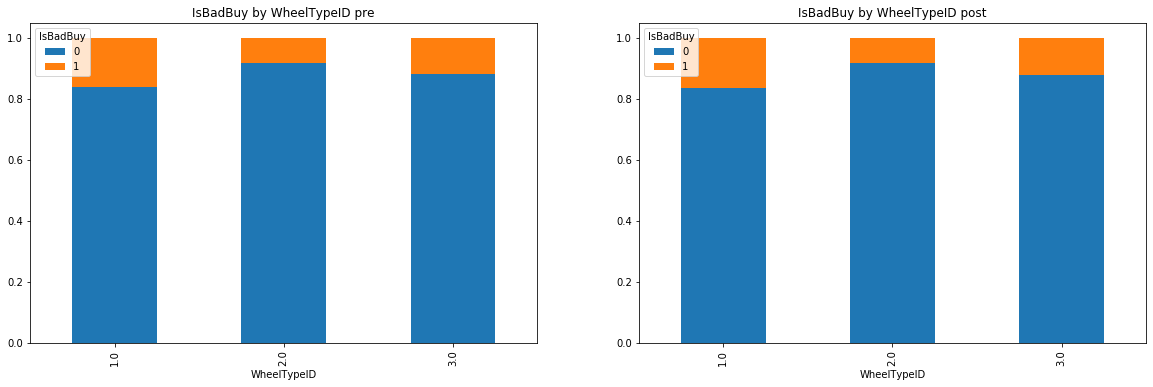

I valori nel pre con meno di 2 elementi sono:
Series([], Name: WheelTypeID, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: WheelTypeID, dtype: int64)





WheelType


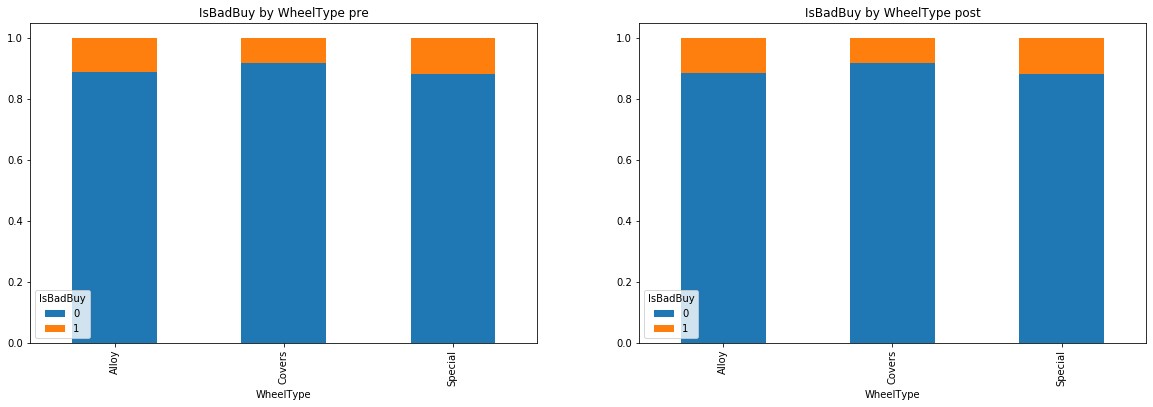

I valori nel pre con meno di 2 elementi sono:
Series([], Name: WheelType, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: WheelType, dtype: int64)





Nationality


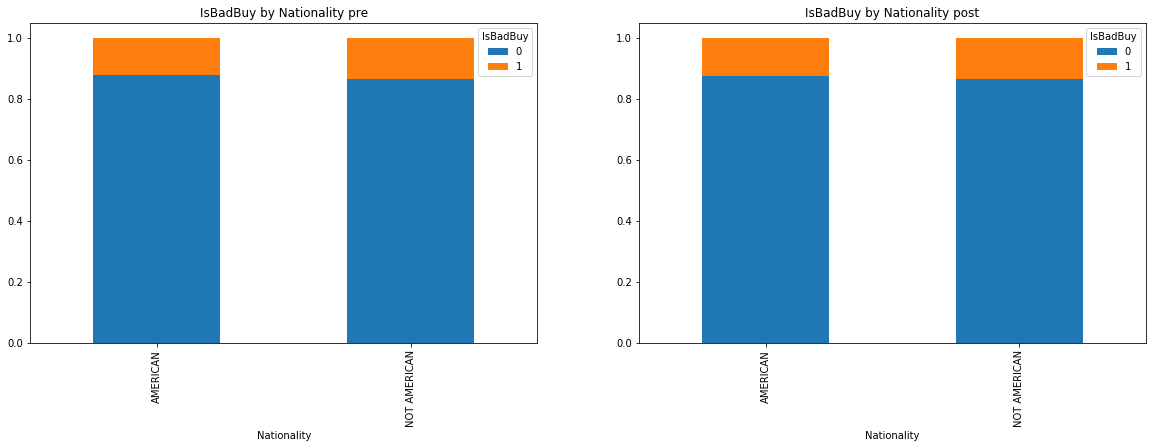

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Nationality, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Nationality, dtype: int64)





Size


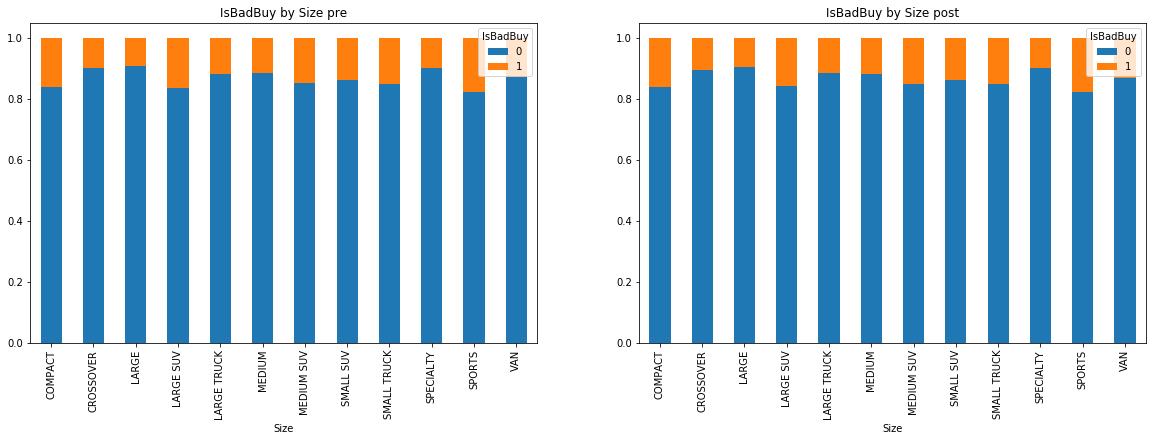

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Size, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Size, dtype: int64)





TopThreeAmericanName


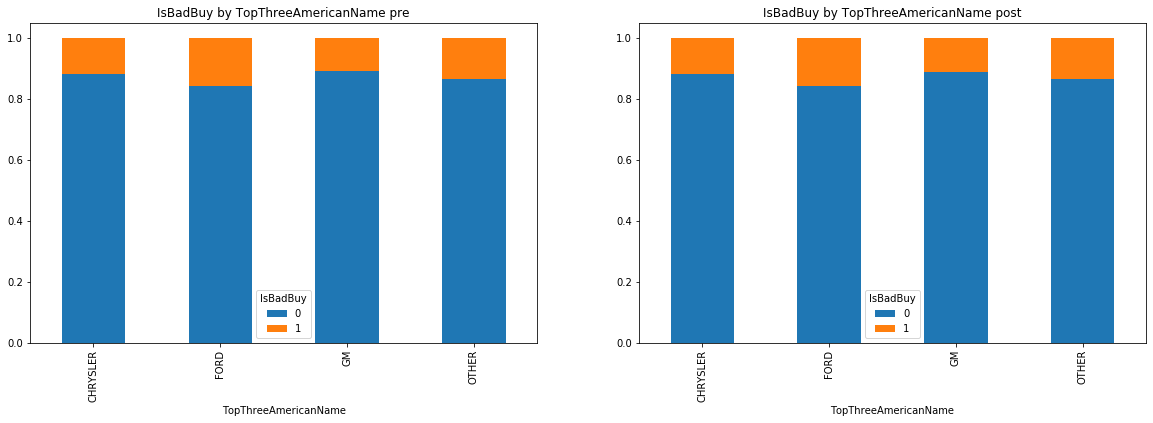

I valori nel pre con meno di 2 elementi sono:
Series([], Name: TopThreeAmericanName, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: TopThreeAmericanName, dtype: int64)





PRIMEUNIT


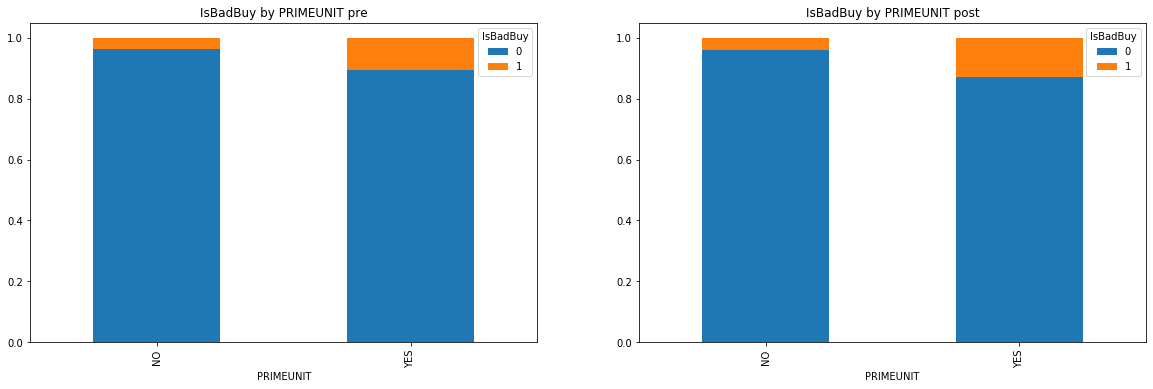

I valori nel pre con meno di 2 elementi sono:
Series([], Name: PRIMEUNIT, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: PRIMEUNIT, dtype: int64)





AUCGUART


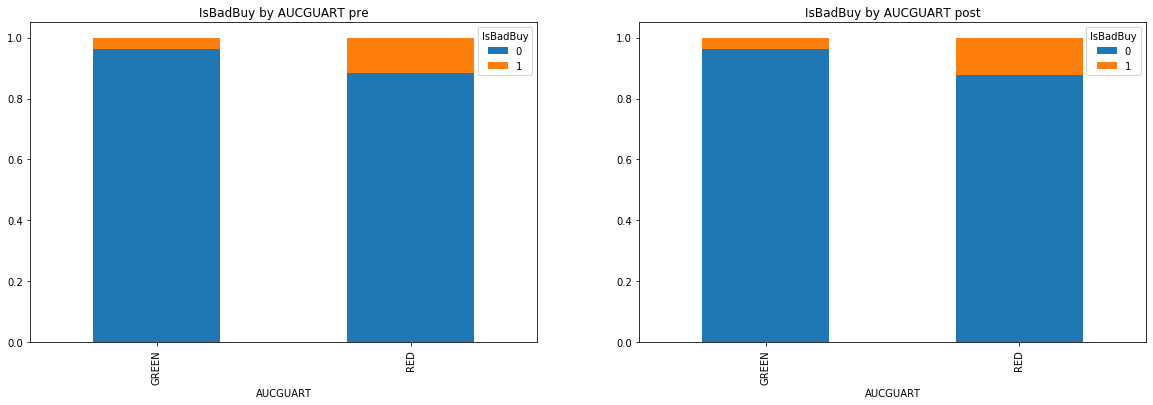

I valori nel pre con meno di 2 elementi sono:
Series([], Name: AUCGUART, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: AUCGUART, dtype: int64)





BYRNO


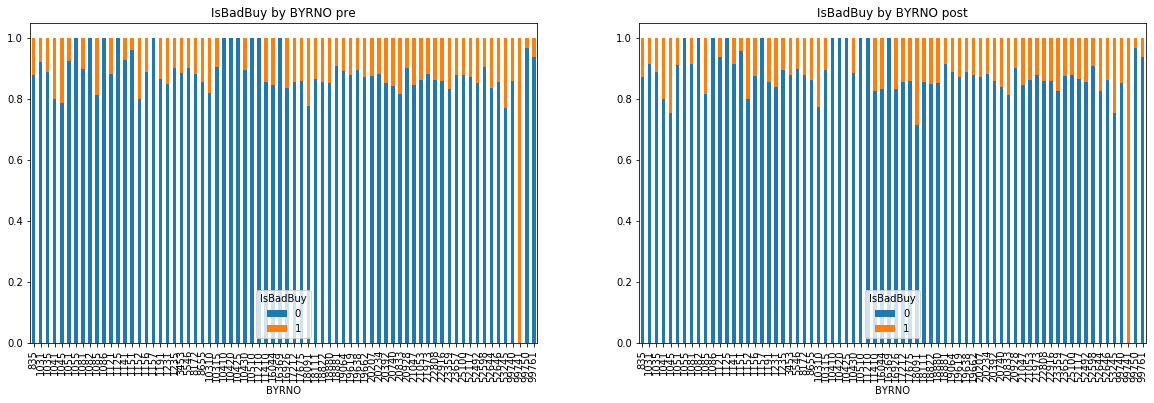

I valori nel pre con meno di 2 elementi sono:
99741    1
1157     1
10425    1
1086     1
Name: BYRNO, dtype: int64


I valori nel post con meno di 2 elementi sono:
1157     1
10425    1
99741    1
1086     1
Name: BYRNO, dtype: int64





VNZIP1


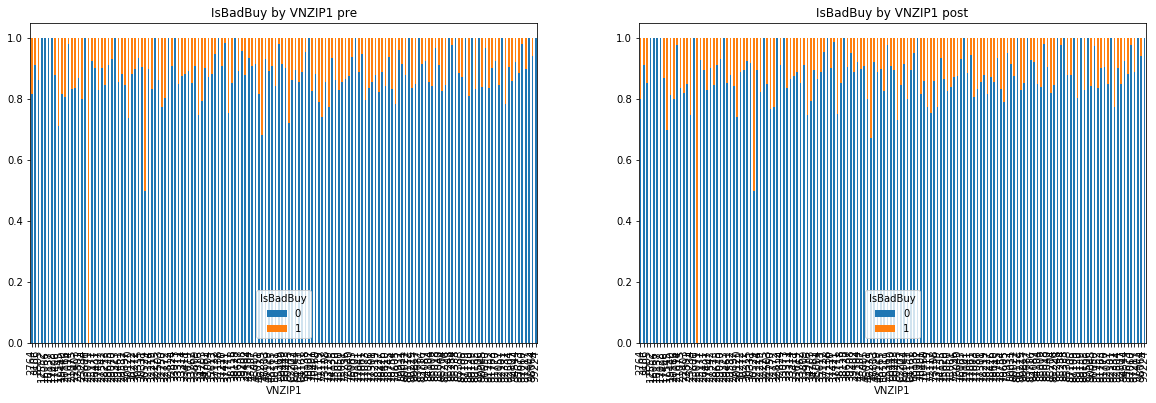

I valori nel pre con meno di 2 elementi sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64


I valori nel post con meno di 2 elementi sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64





VNST


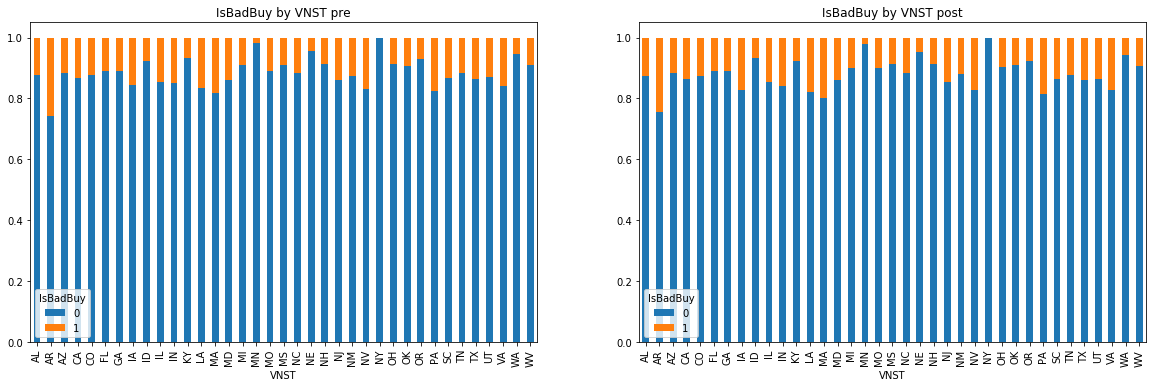

I valori nel pre con meno di 2 elementi sono:
Series([], Name: VNST, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: VNST, dtype: int64)





IsOnlineSale


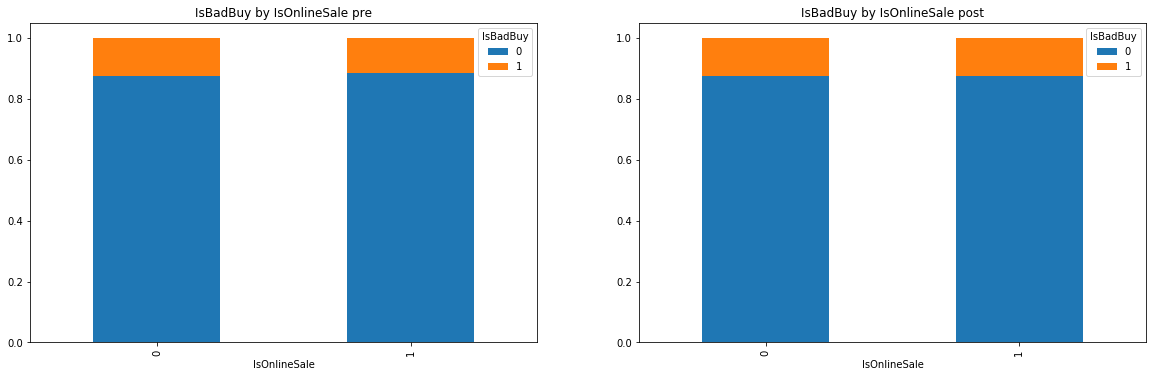

I valori nel pre con meno di 2 elementi sono:
Series([], Name: IsOnlineSale, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: IsOnlineSale, dtype: int64)





Model


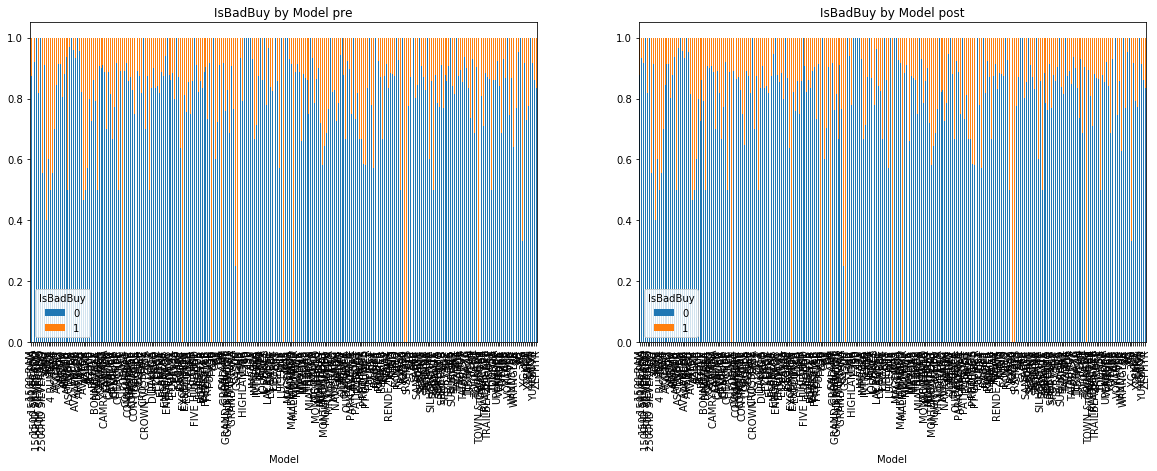

I valori nel pre con meno di 2 elementi sono:
G20              1
TOUAREG          1
MR2 SPYDER       1
GS450H           1
Pacifica         1
RX330            1
FIT              1
MALIBU HYBRID    1
CL               1
S60              1
FX35             1
H3               1
PASSAT           1
I-290            1
IS300            1
G8               1
LHS              1
EXCURSION        1
Name: Model, dtype: int64


I valori nel post con meno di 2 elementi sono:
PASSAT           1
RX330            1
GS450H           1
FIT              1
MALIBU HYBRID    1
MR2 SPYDER       1
TOUAREG          1
Pacifica         1
H3               1
IS300            1
CL               1
G20              1
LHS              1
FX35             1
G8               1
S60              1
EXCURSION        1
I-290            1
Name: Model, dtype: int64





Doors


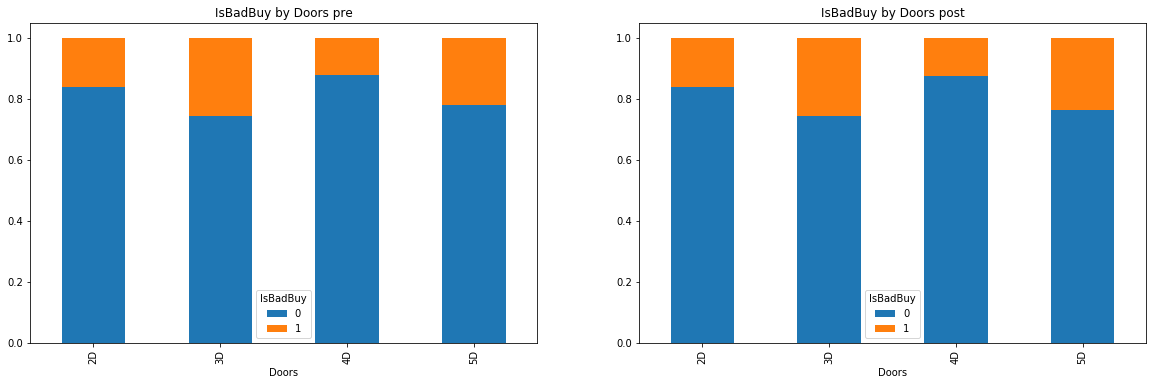

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Doors, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Doors, dtype: int64)





SubModel


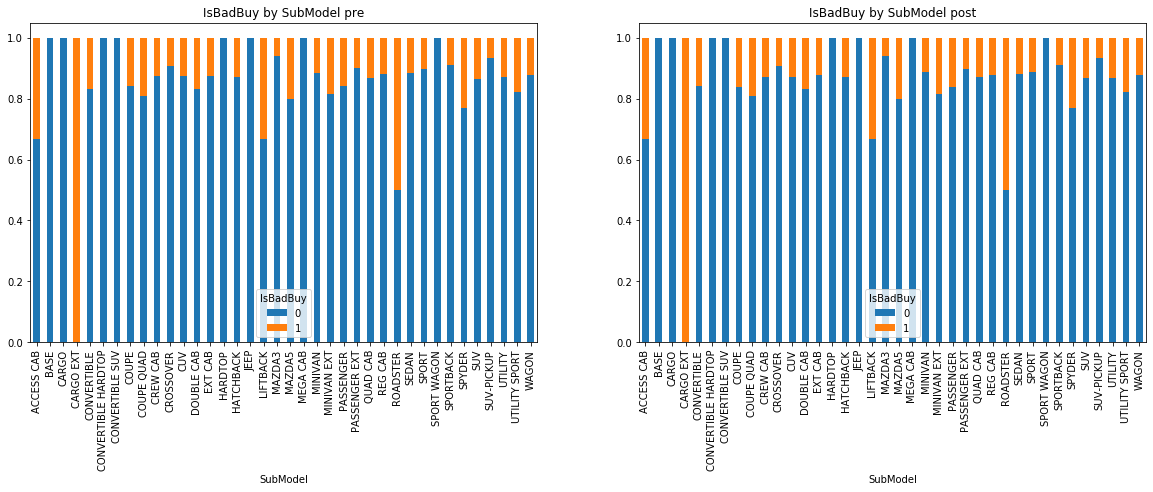

I valori nel pre con meno di 2 elementi sono:
SPORT WAGON    1
CARGO          1
BASE           1
Name: SubModel, dtype: int64


I valori nel post con meno di 2 elementi sono:
SPORT WAGON    1
CARGO          1
BASE           1
Name: SubModel, dtype: int64







In [22]:
for Variable in categories:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        title1=RealTitle+Variable

        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        #Creation of the cross tab
        pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
        pclass_xt1

        #Normalize the cross tab to sum to 1:
        pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
        pclass_xt_pct1

        # Plot old Distribution
        ax1 = plt.subplot2grid(fig_dims, (0, 0))
        pclass_xt_pct1.plot(kind='bar', stacked=True, 
                       title=title1+additional1, ax=ax1)

        if compare:
            #Creation of the cross tab
            pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
            pclass_xt2

            # Normalize the cross tab to sum to 1:
            pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
            pclass_xt_pct2

            # Plot new Distribution
            ax2 = plt.subplot2grid(fig_dims, (0, 1))
            pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

        plt.show()
        
        Count=pre[Variable].value_counts()
        print('I valori nel pre con meno di 2 elementi sono:')
        print(Count.loc[pre[Variable].value_counts()<2])
        print('\n')
        
        if compare:
            Count=post[Variable].value_counts()
            print('I valori nel post con meno di 2 elementi sono:')
            print(Count.loc[post[Variable].value_counts()<2])
        
        print('\n\n\n\n')

# Analisi Comulativa Attributi Numerici

VehOdo


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


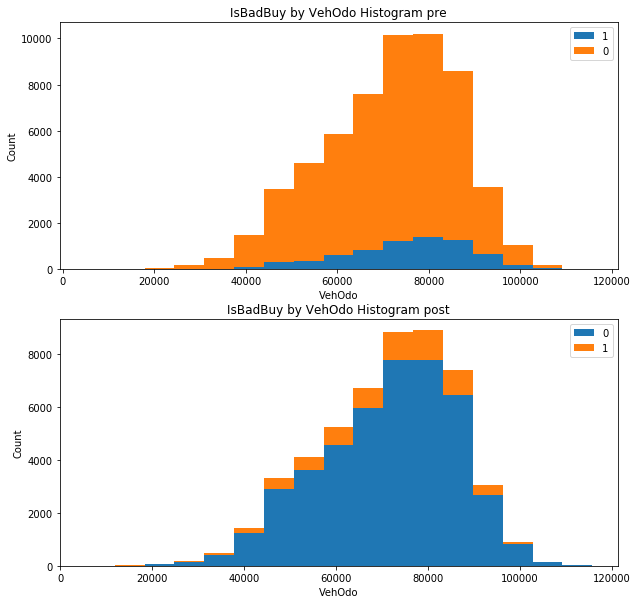

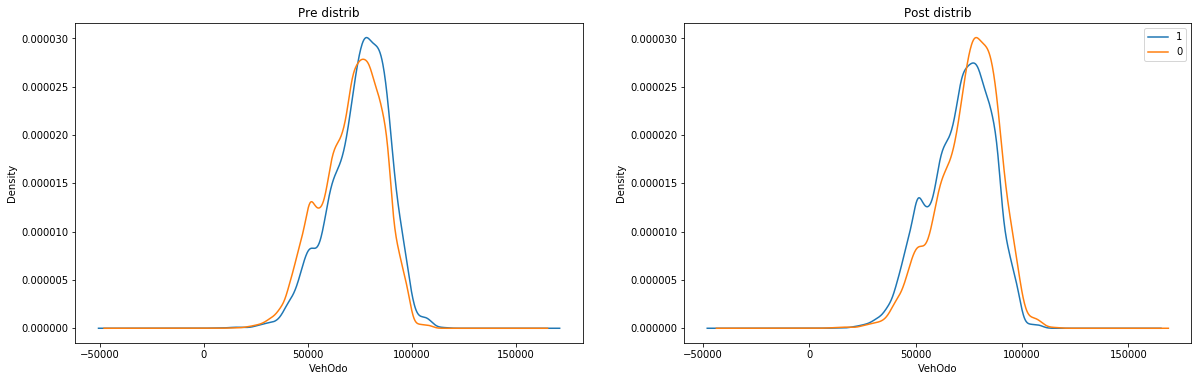

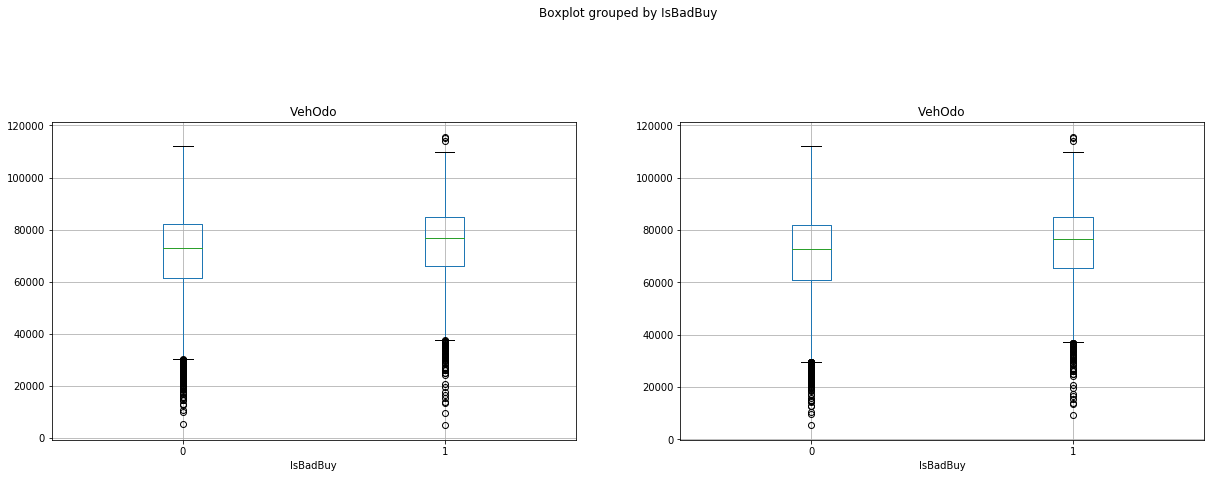






MMRAcquisitionAuctionAveragePrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


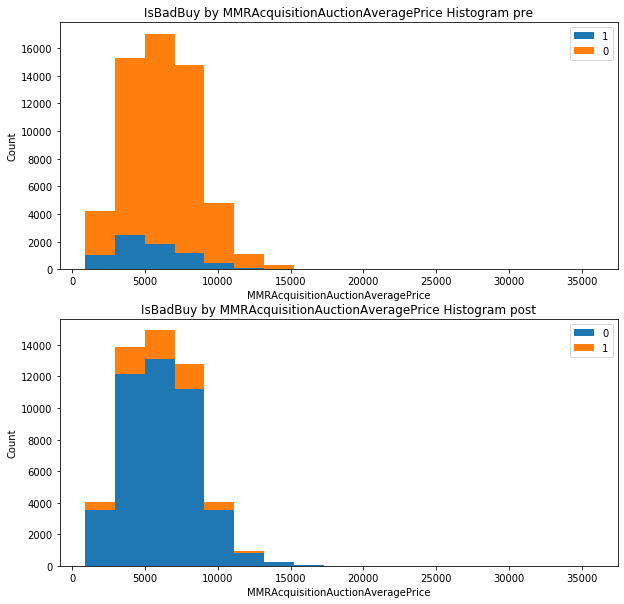

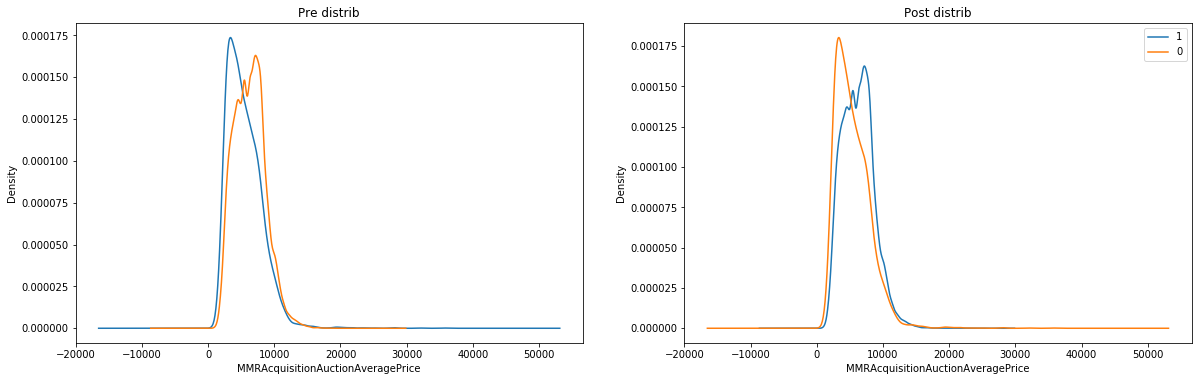

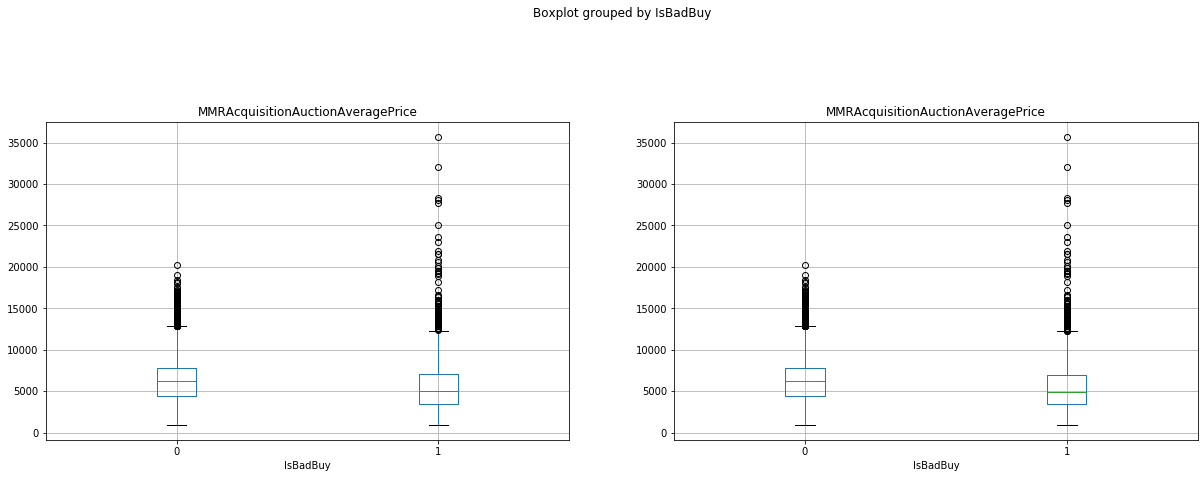






MMRAcquisitionAuctionCleanPrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


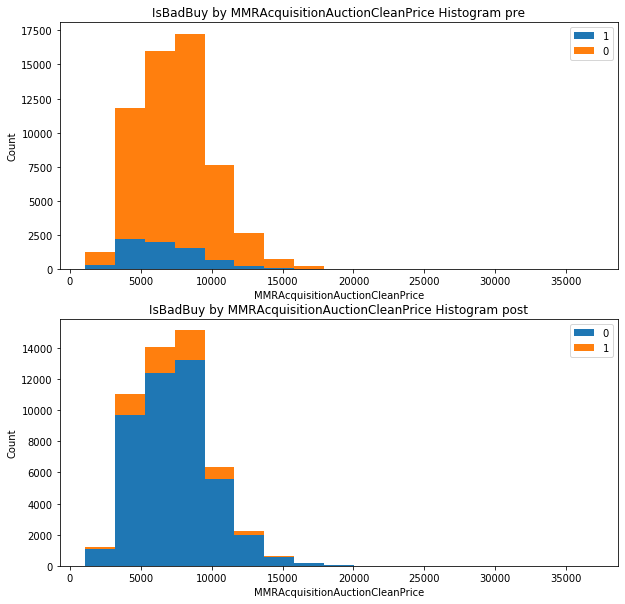

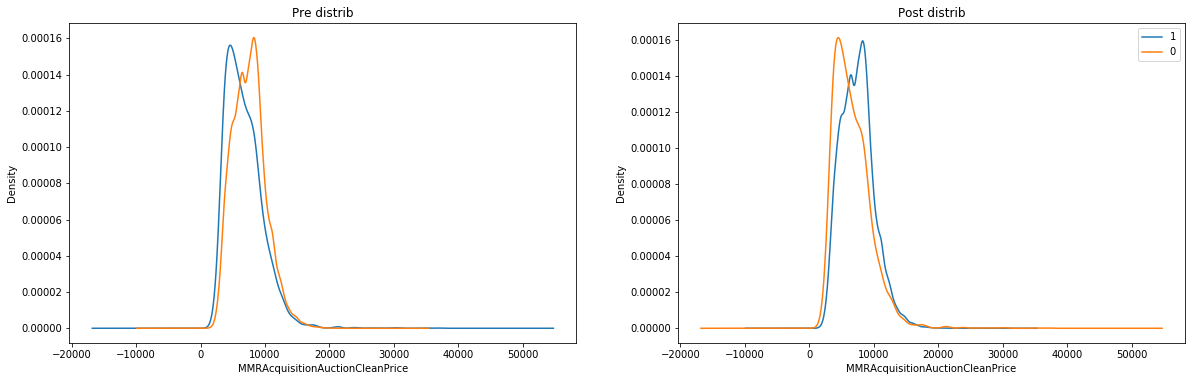

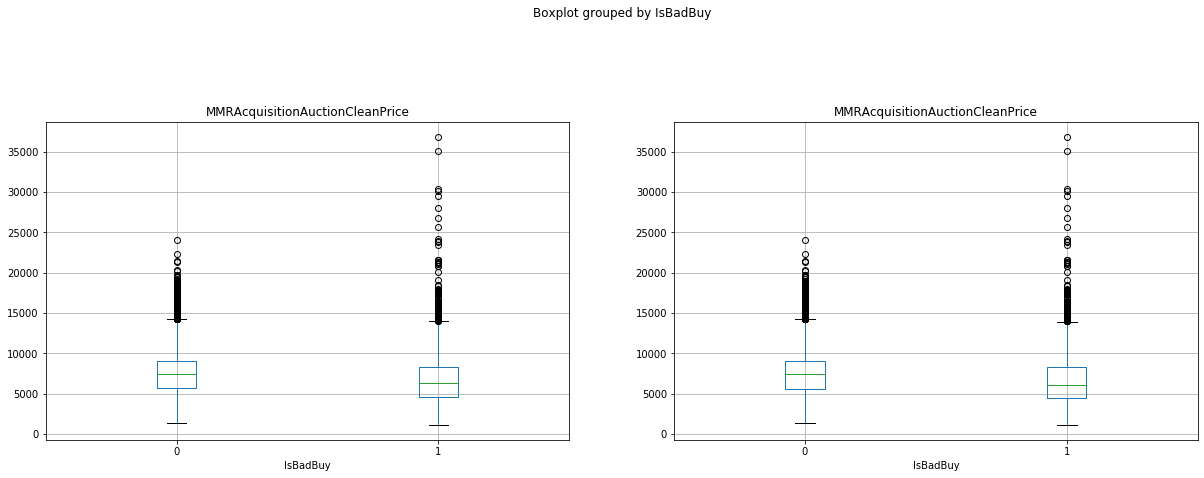






MMRAcquisitionRetailAveragePrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


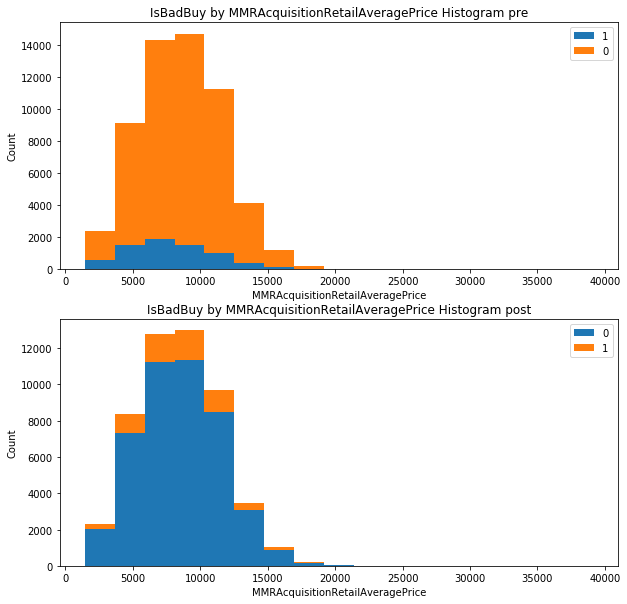

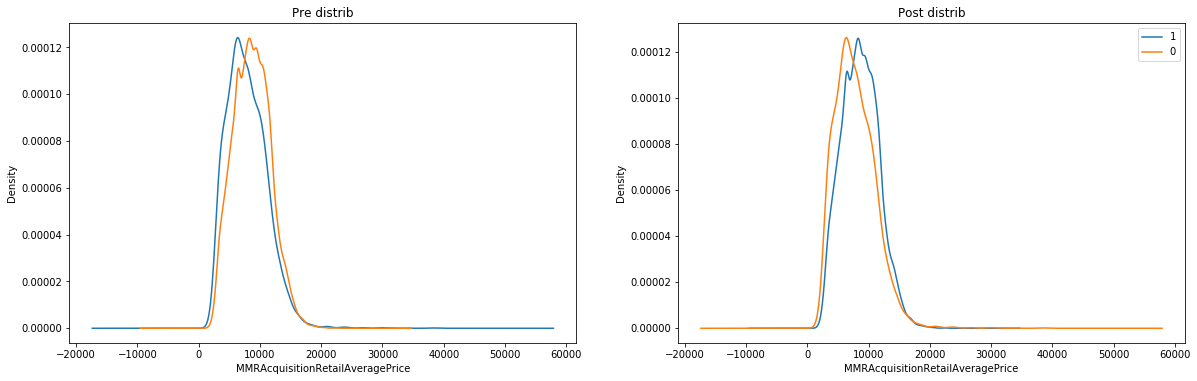

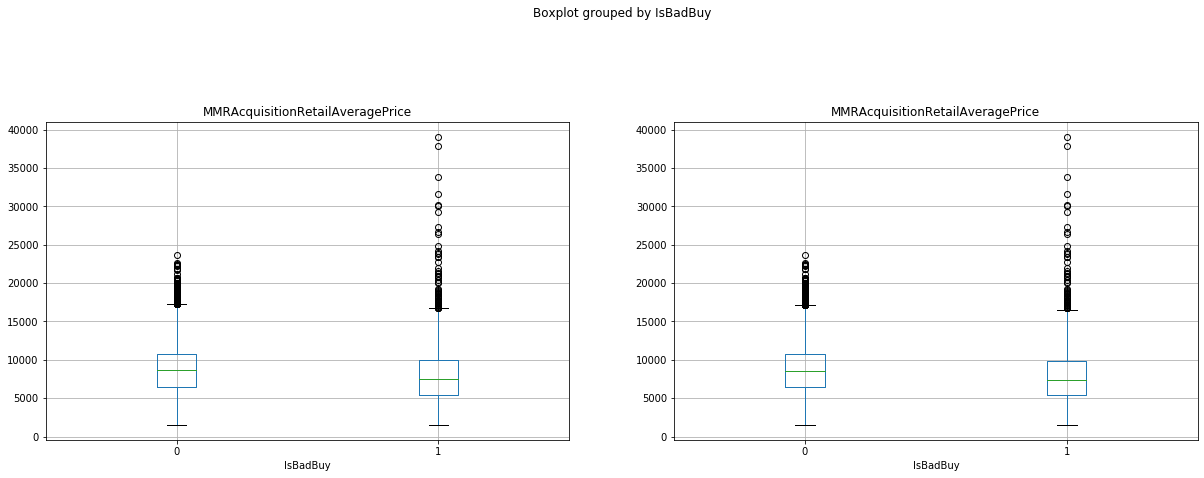






MMRAcquisitonRetailCleanPrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


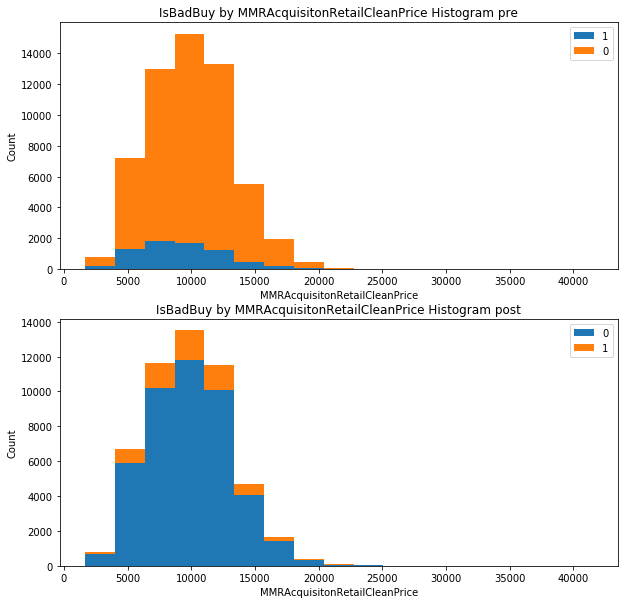

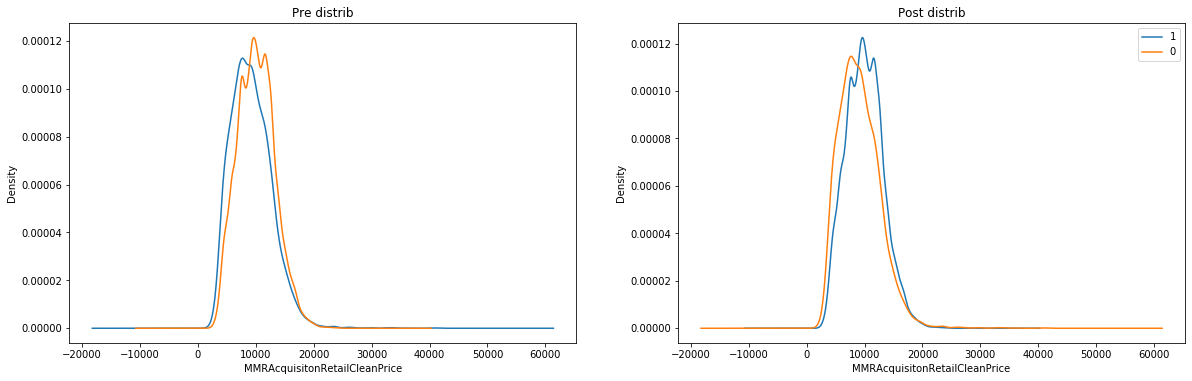

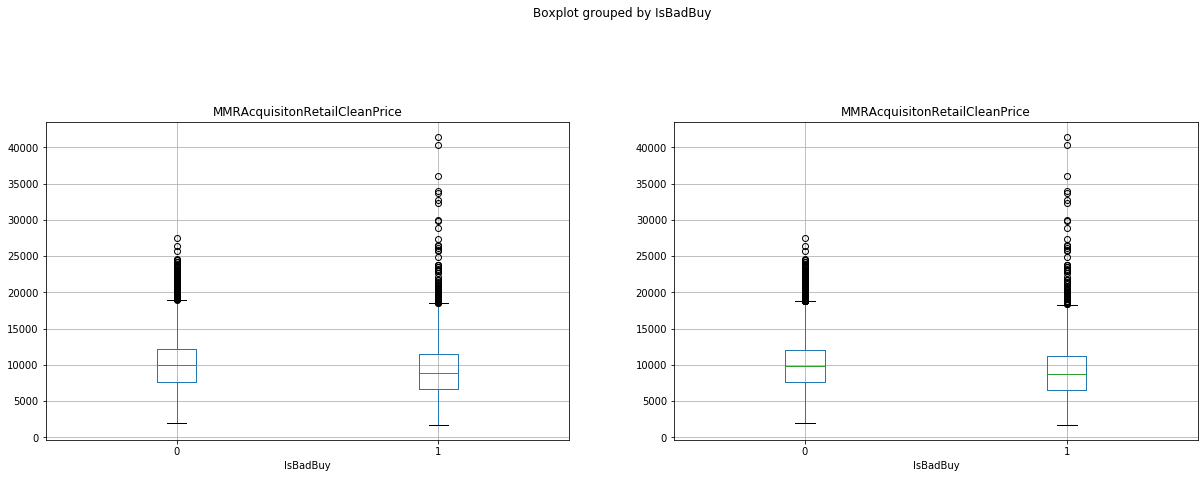






MMRCurrentAuctionAveragePrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


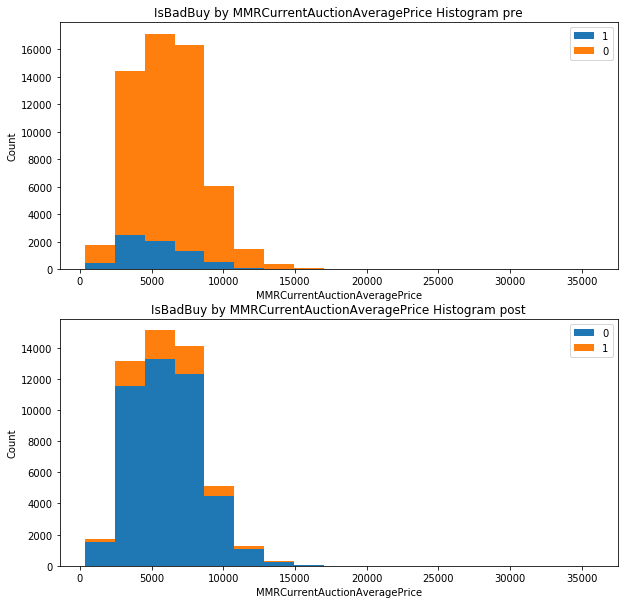

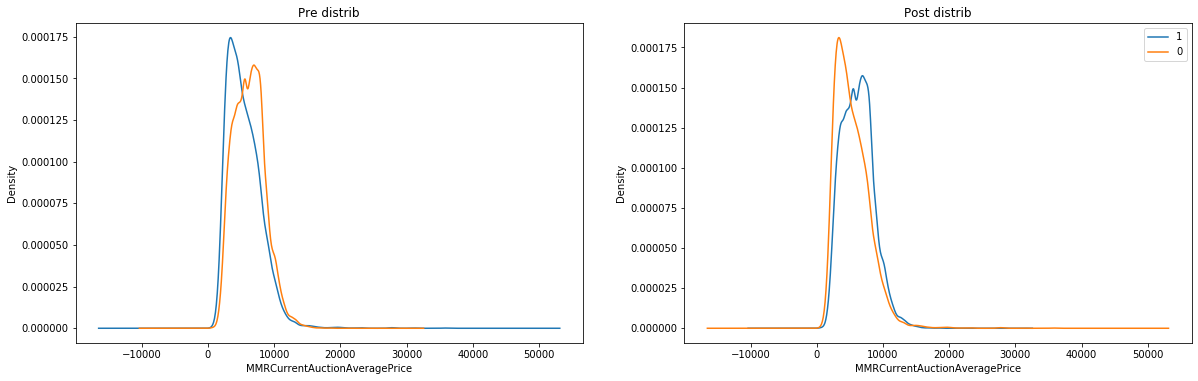

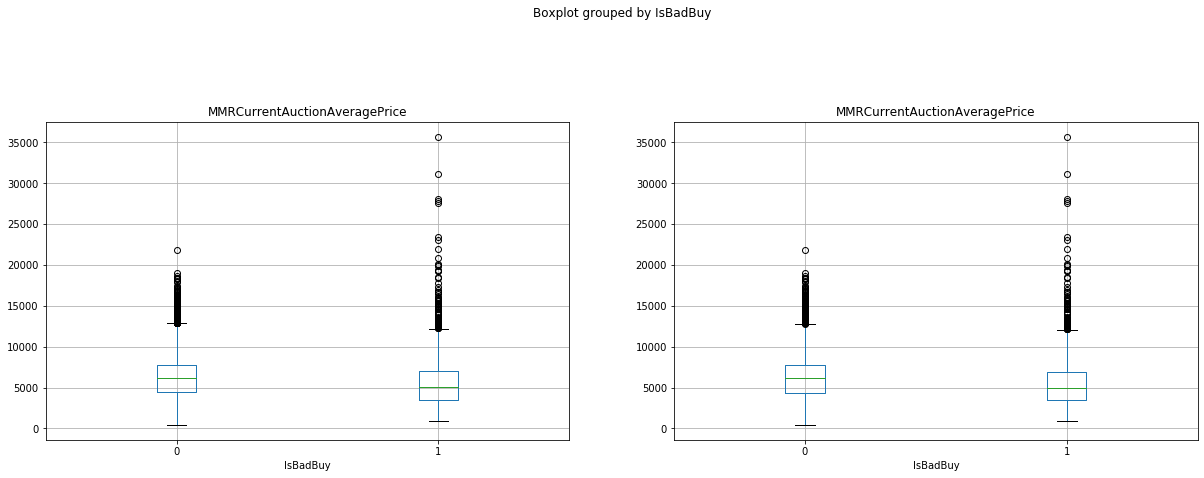






MMRCurrentAuctionCleanPrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


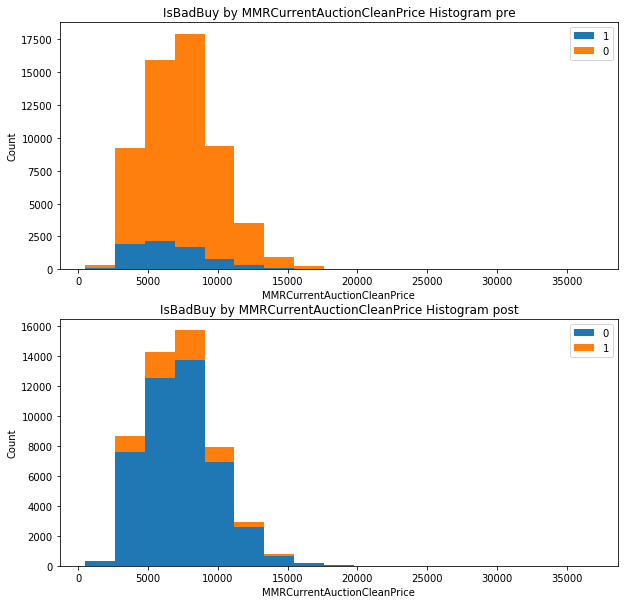

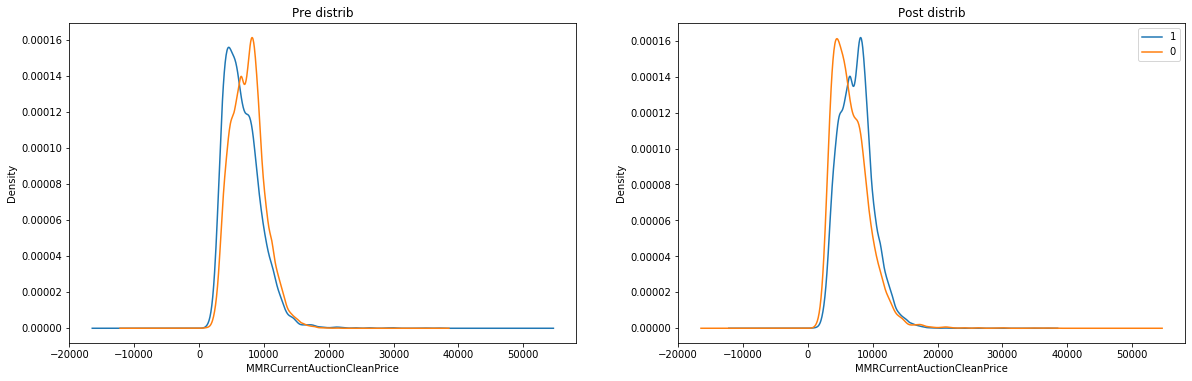

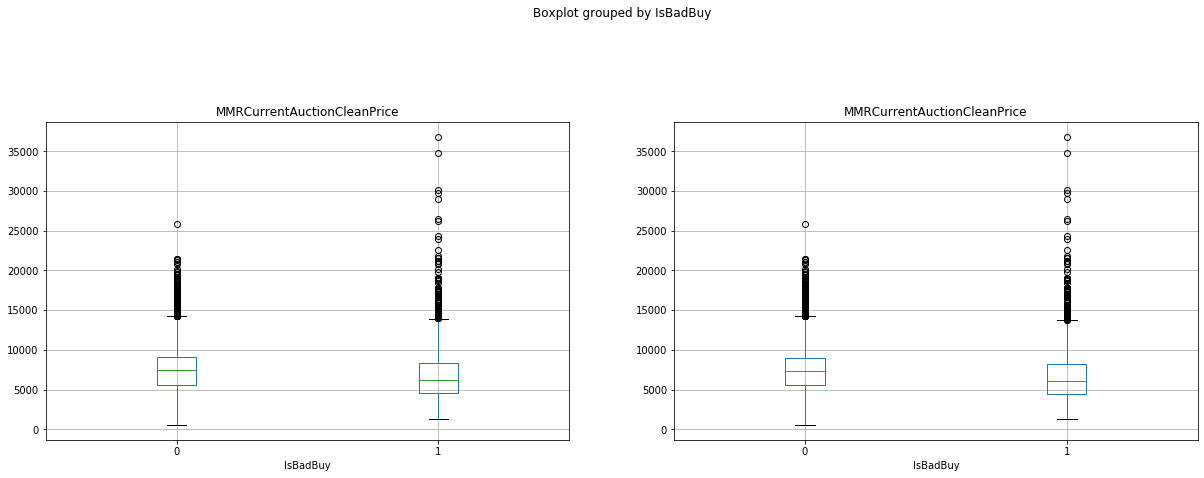






MMRCurrentRetailAveragePrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


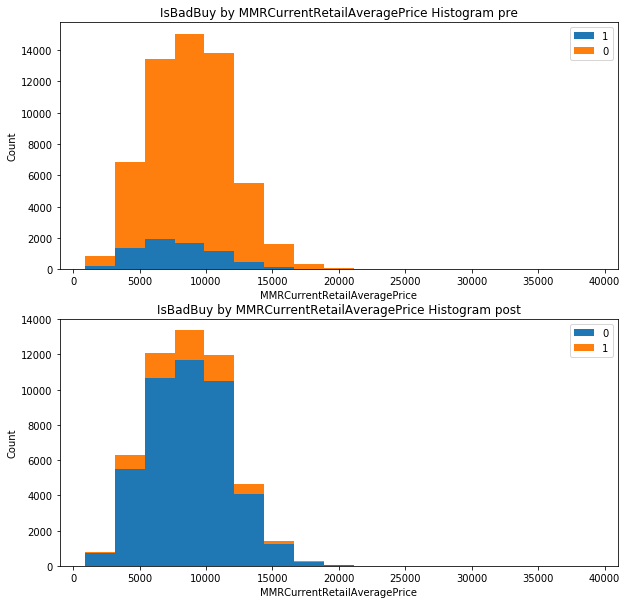

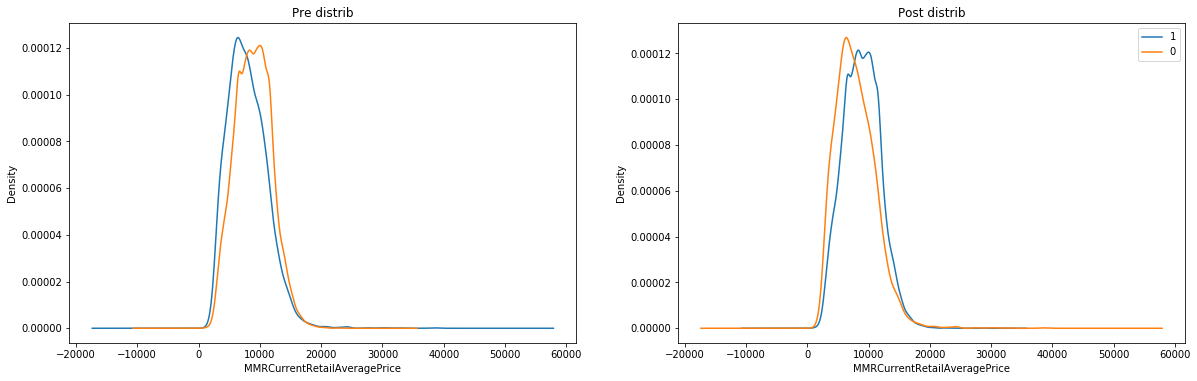

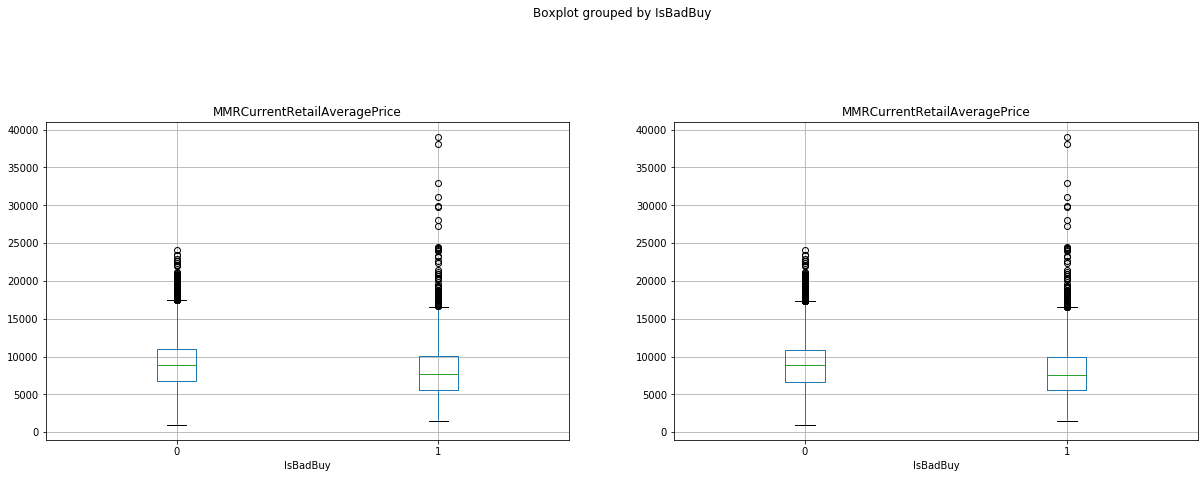






MMRCurrentRetailCleanPrice


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


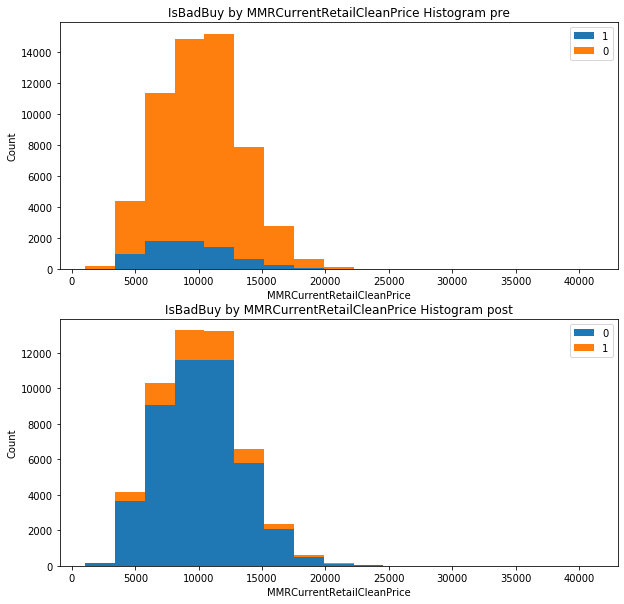

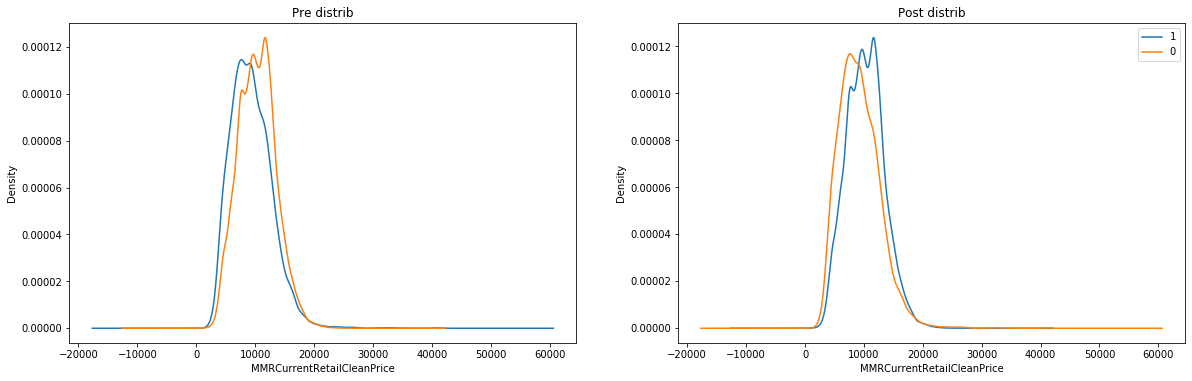

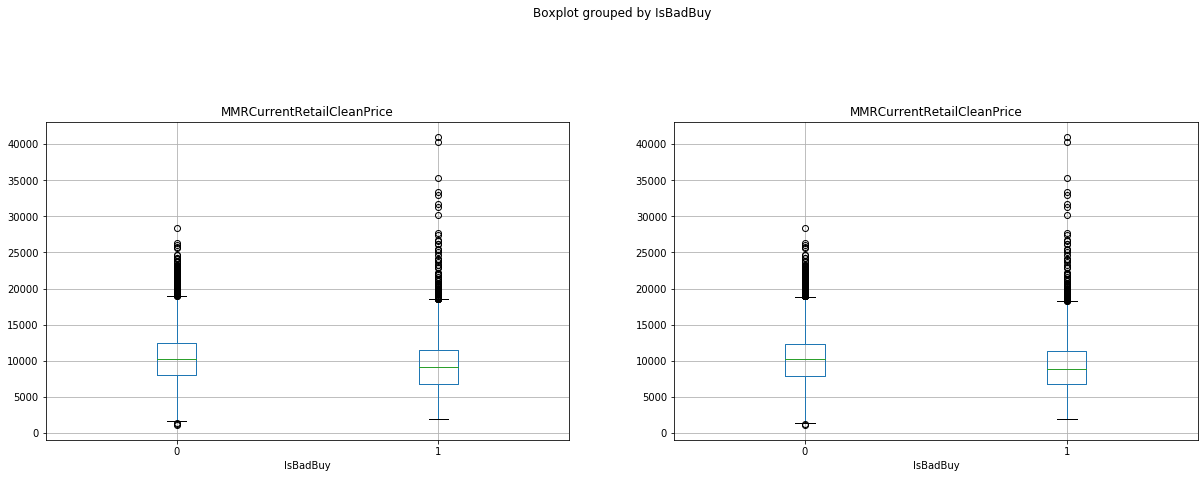






VehBCost


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


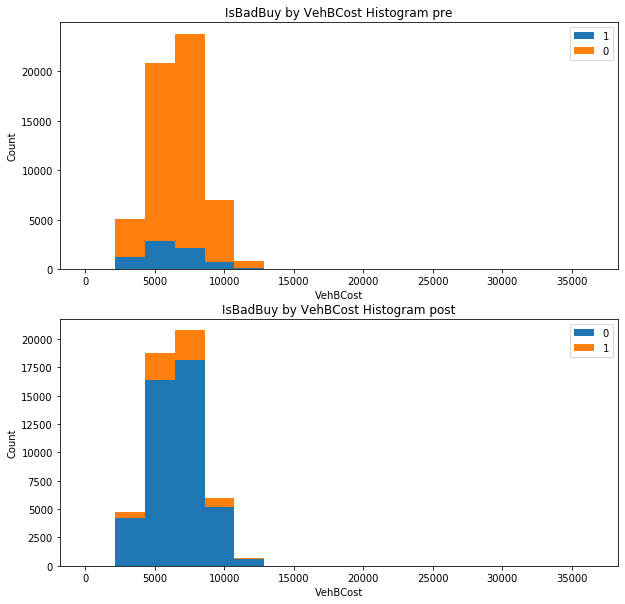

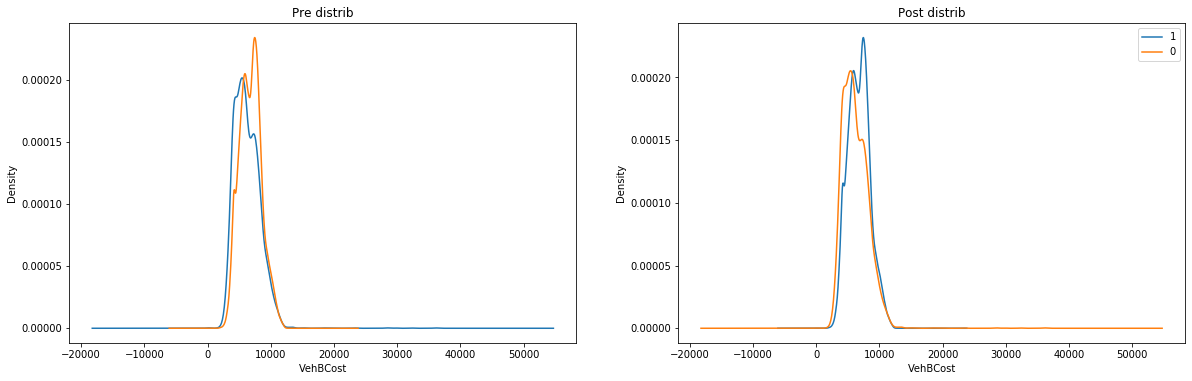

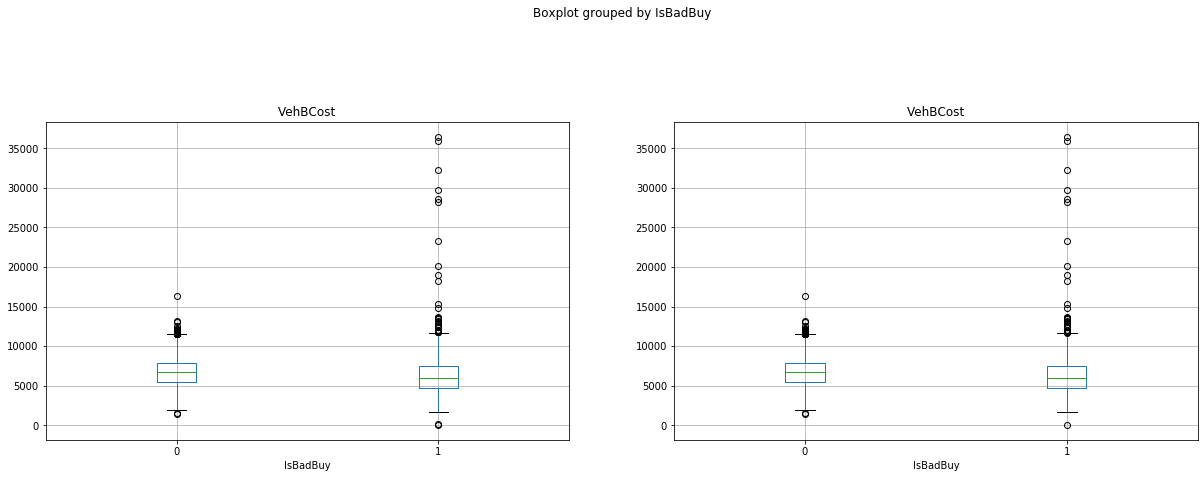






WarrantyCost


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


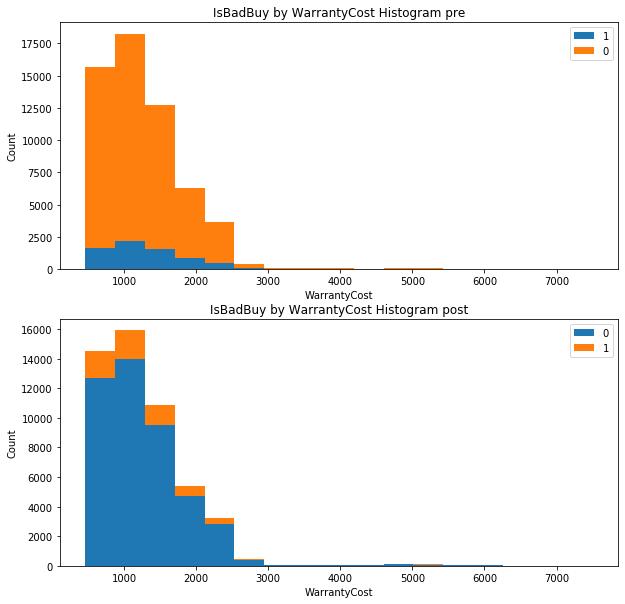

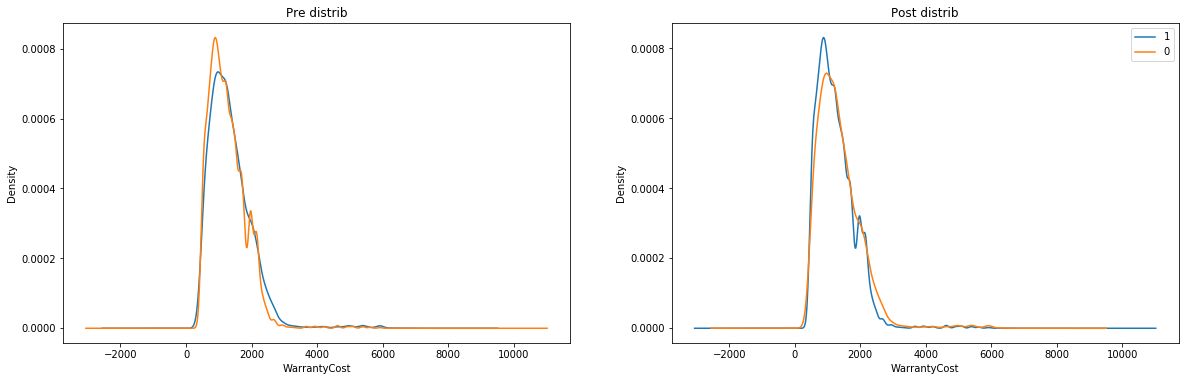

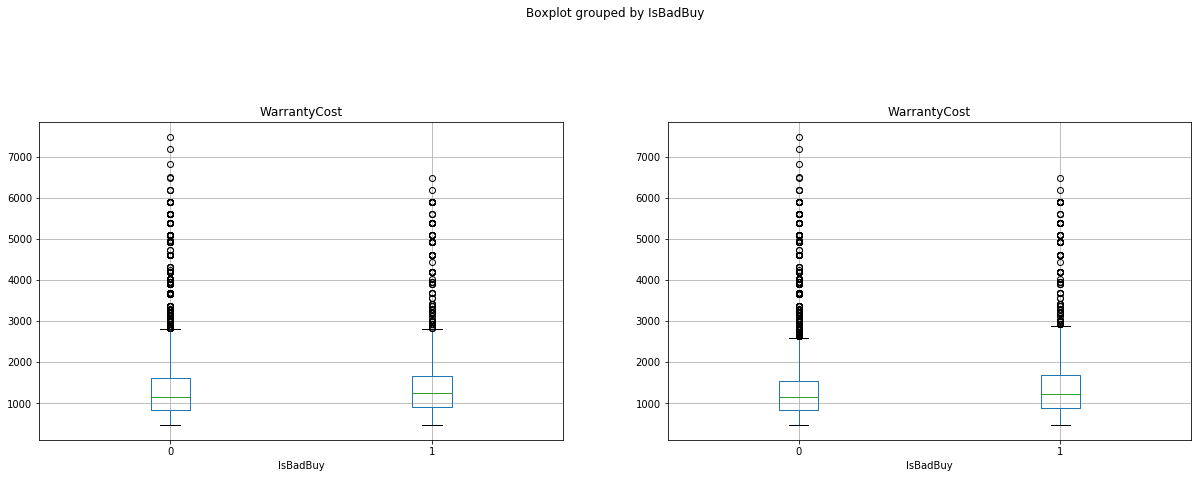

In [23]:
for Variable, limsup, limbot in num_catDis:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        #Histograms
        fig, axes = plt.subplots(2, 1, figsize=(10,10))

        title=RealTitle+Variable+str(' Histogram')
        listUnique=list(pre[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            if pd.notnull(value):
                tmp = pre[pre[VarGroup] == value][Variable]
                listToPlot.append(tmp)

        max1 = pre[Variable].max()
        min1 = pre[Variable].min()
        bins1 = PreBins
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()
        

        axes[0].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[0].legend(tuple(listUnique), loc='best')
        axes[0].set_title(title+additional1)
        axes[0].set_xlabel(Variable)
        axes[0].set_ylabel('Count')

        if compare:
            listUnique=list(post[VarGroup].unique())
            listToPlot=[]

            for value in listUnique:
                if pd.notnull(value):
                    tmp = post[pre[VarGroup] == value][Variable]
                    listToPlot.append(tmp)

            max1 = post[Variable].max()
            min1 = post[Variable].min()
            bins1 = PostBins
    
            if pre[Variable].nunique() <20:
                bins1=pre[Variable].nunique()

            axes[1].hist(listToPlot, 
                         bins=bins1, # bin_size
                         range=(min1, max1), 
                         stacked=True)


            axes[1].legend(tuple(listUnique), loc='best')
            axes[1].set_title(title+additional2)
            axes[1].set_xlabel(Variable)
            axes[1].set_ylabel('Count')
        
        plt.show()
        
        
        #DensityPlot
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)
        
        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Pre distrib', xlabel=Variable)
        for Group_Class in pre[VarGroup].unique():
                if pd.notnull(Group_Class):
                    pre[Variable][pre[VarGroup] == Group_Class].plot(kind='kde')

        # Plot new Distribution
        if compare:
            plt.subplot2grid(fig_dims, (0, 1), title='Post distrib', xlabel=Variable)
            for Group_Class in post[VarGroup].unique():
                if pd.notnull(Group_Class):
                    post[Variable][post[VarGroup] == Group_Class].plot(kind='kde')
        
        plt.legend(tuple(pre[VarGroup].unique()), loc='best')
        plt.show()
        
        #Boxplot
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        ax1=plt.subplot2grid(fig_dims, (0, 0), title='Pre distrib')
        pre.boxplot(column=[Variable], by=VarGroup, ax=ax1)

        # Plot new Distribution
        if compare:
            ax2=plt.subplot2grid(fig_dims, (0, 1), title='Post distrib')
            post.boxplot(column=[Variable], by=VarGroup, ax=ax2)

        plt.show()
        
        print('\n\n\n\n')